<a href="https://colab.research.google.com/github/hiderbrandon/SimulationProject/blob/develop/Proyecto_final_simulaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computacion y Simulacion Numerica
##sustentacion

###Parte 1 y 2

Configuración básica de la red y visualización

####DESCRIPCIÓN DEL DATASET

El dataset proporciona un conjunto de caracteres manuscritos de todas las letras del alfabeto inglés (de la A a la Z). Este conjunto es útil para entrenar modelos de reconocimiento de escritura, como redes neuronales convolucionales (CNN). Fue construido a partir de datos extraídos del MNIST Extended Dataset (EMNIST).

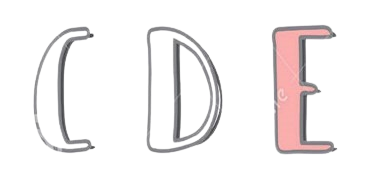

#####CARACTERÍSTICAS PRINCIPALES:

######Tamaño del Dataset:

*  Contiene un total de 372,450 muestras de letras manuscritas.
*  Cada muestra representa una imagen de una letra manuscrita convertida a formato numérico.


######Formato de los datos:

*  Cada fila del CSV corresponde a una imagen de tamaño 28x28 píxeles, representada como un vector de 784 características.
*  Los valores de los píxeles son enteros entre 0 y 255, donde 0 representa el color negro y 255 el color blanco.


######Etiquetas:


* Cada muestra está etiquetada con un número entre 0 y 25, donde cada número corresponde a una letra del alfabeto (0 = A, 1 = B, ..., 25 = Z).


######Propósito:

* Diseñado para tareas de clasificación y aprendizaje supervisado, este dataset es ideal para enseñar a los modelos a distinguir entre letras manuscritas, una habilidad importante en aplicaciones como el reconocimiento óptico de caracteres (OCR).

######Distribución de las clases:

Las clases están distribuidas de manera desigual, lo que puede requerir estrategias de balanceo en problemas de aprendizaje.

######Aplicaciones comunes:

* Reconocimiento de caracteres manuscritos.
* Entrenamiento de modelos de aprendizaje profundo (como CNNs).
* Creación de aplicaciones OCR.
* Proyectos educativos para explorar técnicas de preprocesamiento de datos y clasificación de imágenes.


Comenzamos con la preparación del dataset EMNIST con el objetivo de entrenar un modelo de aprendizaje profundo utilizando PyTorch.

In [ ]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt



**1. Importamos herramientas esenciales:**

Usamos PyTorch, una biblioteca potente y flexible para aprendizaje profundo. También incorporamos módulos como torchvision, que nos facilita acceder y transformar datasets populares, y matplotlib, para la visualización de los resultados.

**2. Preparamos los datos:**

Antes de entrenar un modelo, debemos asegurarnos de que los datos están en el formato correcto. Por eso, aplicamos transformaciones:

  * Conversión a tensores: Las imágenes, originalmente en formato de matrices, se convierten en tensores que PyTorch puede manejar.

  * Normalización: Ajustamos los valores de los píxeles al rango [-1, 1]. Esto no solo acelera el entrenamiento, sino que también mejora la estabilidad del modelo.

**3. Cargamos el dataset EMNIST:**

Seleccionamos el split 'letters', que incluye más de 145,000 imágenes de letras manuscritas. Este dataset se descarga automáticamente desde una fuente oficial, o se carga desde nuestro almacenamiento local si ya está disponible.

**4. Preparamos el DataLoader:**

Para manejar eficientemente el dataset, lo dividimos en lotes de tamaño 64 y los mezclamos. Esto permite que el modelo procese pequeñas porciones de datos a la vez, lo cual optimiza el tiempo de entrenamiento y asegura que el modelo no aprenda patrones relacionados al orden de las muestras.

**5. Verificamos la configuración:**

Finalmente, imprimimos el número total de imágenes cargadas para confirmar que el dataset está listo para usarse.

**¿Por qué es importante este pipeline?**

Este proceso establece las bases para entrenar redes neuronales. Al estructurar y preprocesar los datos correctamente, garantizamos que el modelo pueda enfocarse en aprender patrones significativos, como las formas únicas de las letras manuscritas, en lugar de distraerse con ruido o variaciones en la escala de los datos.

In [ ]:
from torchvision import datasets, transforms
import torch

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalización a rango [-1, 1]
])

# Descargar y cargar el conjunto de entrenamiento EMNIST (split='letters')
trainset = datasets.EMNIST(root='~/.pytorch/EMNIST_data/', split='letters', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Verificar la configuración
print(f"Dataset EMNIST cargado con {len(trainset)} muestras de entrenamiento.")

Dataset EMNIST cargado con 124800 muestras de entrenamiento.


A continuación vamos a inspeccionar los datos cargados en el modelo.
Queremos verificar que las imágenes y etiquetas están correctamente organizadas en lotes antes de iniciar el entrenamiento.

El DataLoader (trainloader) organiza el dataset en lotes (batches). Para acceder a los datos en un lote, se crea un iterador (dataiter). Este iterador permite recorrer el dataset de forma ordenada, lote por lote.

**¿Qué hace?**

Utiliza la función next() para extraer el siguiente lote del iterador. En este caso:
images: Contiene un tensor con las imágenes del lote.
labels: Contiene las etiquetas correspondientes (las clases de las imágenes).

Finalmente, imprimimos el tipo y la estructura de los datos para confirmar que todo está en orden.

**Por qué hacerlo?**

* Identificar problemas en el flujo de los datos
* Verificar que las dimensiones del tensor sean compatibles
* Evitar errores durante el entrenamiento

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


**Ejemplo gráfico:**
Al ejecutar este código, veremoss la primera imagen del lote junto con su etiqueta en la parte superior.

In [ ]:
import matplotlib.pyplot as plt

# Mostrar la primera imagen del lote
plt.imshow(images[0].squeeze(), cmap="gray")
plt.title(f"Etiqueta: {labels[0].item()}")
plt.show()

NameError: name 'images' is not defined

 A continuación implementamos un modelo de red neuronal simple con dos capas completamente conectadas (fully connected) para realizar clasificación sobre las imágenes de letras manuscritas.

 **1. Preprocesamiento de datos:**

 Las imágenes de entrada, que tienen dimensiones de 28x28 píxeles, se 'aplanan' en un vector de 784 elementos para que puedan ser procesadas por la red neuronal.

 **2. Inicialización de parámetros:**

  Los pesos y sesgos de cada capa son inicializados aleatoriamente. La primera capa tiene 256 neuronas y la segunda capa tiene 26 neuronas, correspondientes a las 26 posibles clases de letras.

**3. Propagación hacia adelante:**

* La primera capa toma las características de entrada y las transforma usando multiplicación matricial y un sesgo. La salida de la primera capa pasa por una función de activación sigmoide para introducir no linealidad.

* La salida de la primera capa es luego alimentada a la segunda capa, que produce las predicciones finales para cada imagen (26 clases posibles).

**4. Salida del modelo:**

 La salida final es un tensor con forma (batch_size, 26), que contiene las predicciones de las 26 clases posibles."



In [ ]:
def activation(x):
    return 1/(1+torch.exp(-x))

### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are flattered image tensor
features = images.view(images.shape[0], 784)
print(f"features shape {features.shape}")

#layer 1 parameters
w1 = torch.rand(features.shape[1] , 256)
b1 = torch.randn(256)

#layer 2 parameters
w2 = torch.randn(256, 26)
b2 = torch.randn(26)

h = activation(torch.mm(features, w1) + b1)

out = activation(torch.mm(h, w2) + b2)

print(f"output {out.shape}")

features shape torch.Size([64, 784])
output torch.Size([64, 26])


En este código implementamos la función ***Softmax***, que convierte los valores de salida de la red neuronal (conocidos como logits) en probabilidades. La función Softmax toma un vector de valores reales y los mapea a un rango entre 0 y 1, asegurando que la suma de todas las probabilidades sea igual a 1, lo que las convierte en una distribución de probabilidad válida.

**El procedimiento se realiza en los siguientes pasos:**

1. Calculamos el exponente de cada valor en el tensor de salida.
2. Sumamos estos exponentes a lo largo de las clases para obtener el denominador de la fórmula de Softmax.
3. Dividimos los exponentes de cada clase por esta suma, lo que normaliza las salidas a un rango entre 0 y 1.
4. Finalmente, verificamos que las probabilidades tengan la forma correcta (batch_size, num_classes) y que sumen 1 para cada imagen, lo que garantiza que los valores generados representen una distribución de probabilidad válida."

In [ ]:
def softmax(x):
    ## TODO: Implement the softmax function here
  denominator = torch.sum(torch.exp(x) , dim=1).view(torch.exp(x).shape[0], 1 )
  x_sum = torch.exp(x)/denominator
  print(f"x_sum {x_sum.shape}")

  return x_sum


# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

x_sum torch.Size([64, 26])
torch.Size([64, 26])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


**POR FI VERIFICA PORQUE CREO QUE ESTO Y LO DE ABAJO QUE DEJÉ COMENTADO NO VA, LO ELIMINAS. **

En los siguientes bloques de código definimos una red neuronal simple con PyTorch utilizando su módulo nn. La red tiene dos capas principales:

* Capa oculta (Hidden Layer): Esta capa toma la entrada (una imagen de 28x28 píxeles, aplanada a 784 características) y la transforma en 256 valores. Esto se realiza mediante una transformación lineal utilizando nn.Linear.

* Capa de salida (Output Layer): La salida de la capa oculta se pasa a una capa lineal que produce 10 valores, correspondientes a las 10 clases (en nuestro caso, letras). Estos valores representan los logits.

Además, definimos dos funciones de activación:

* Sigmoide: Para agregar no linealidad a la salida de la capa oculta.
* Softmax: Para convertir los logits en probabilidades, que suman 1 para cada muestra del batch.

La función forward define cómo los datos fluyen a través de la red: desde la capa oculta, pasando por la función sigmoide, la capa de salida, y finalmente la función softmax para obtener las probabilidades de cada clase."

In [ ]:
#from torch import nn

In [ ]:
'''class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)

        # Define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)

        return x '''

'class Network(nn.Module):\n    def __init__(self):\n        super().__init__()\n\n        # Inputs to hidden layer linear transformation\n        self.hidden = nn.Linear(784, 256)\n        # Output layer, 10 units - one for each digit\n        self.output = nn.Linear(256, 10)\n\n        # Define sigmoid activation and softmax output\n        self.sigmoid = nn.Sigmoid()\n        self.softmax = nn.Softmax(dim=1)\n\n    def forward(self, x):\n        # Pass the input tensor through each of our operations\n        x = self.hidden(x)\n        x = self.sigmoid(x)\n        x = self.output(x)\n        x = self.softmax(x)\n\n        return x '

A continuación, definimos una red neuronal simple con tres capas lineales (fc1, fc2, fc3). La red toma una imagen de 28x28 píxeles aplanada a un vector de 784 características y la pasa a través de tres capas ocultas de tamaños 128, 64, y finalmente produce una salida de 10 valores (uno para cada clase o letra).

**Características importantes:**

* Funciones de activación ReLU: Se aplica la función de activación ReLU (Rectified Linear Unit) en todas las capas ocultas. Esta función ayuda a introducir no linealidad en el modelo, lo que le permite aprender representaciones más complejas.

* Capas lineales: Las capas están definidas como transformaciones lineales, lo que significa que cada capa realiza una combinación lineal de las entradas.

* Capa de salida: En este caso, también se aplica ReLU en la capa de salida, aunque usualmente para tareas de clasificación multiclase, se usaría Softmax para obtener probabilidades.

Finalmente, creamos una instancia del modelo con model = Network() y estamos listos para entrenar o realizar inferencia.

In [ ]:
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #defining layers
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 26)

    def forward(self, x):
        # Hidden layer with Relu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # Output layer with Relu activation
        x = F.relu(self.fc3(x))

        return x


model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=26, bias=True)
)

Implementamos una red neuronal de 2 capas utilizando funciones y operaciones básicas de PyTorch:

Definición de la función de activación (sigmoide):

Se utiliza una función sigmoide para introducir no linealidad en las salidas de las capas de la red.

Generación de datos:

 Se aplana la imagen de entrada (28x28 píxeles) en un vector de 784 valores.

Parámetros de la red:

Se inicializan los pesos y sesgos de las dos capas:
* Capa 1: 784 entradas (características de la imagen) y 256 neuronas.
* Capa 2: 256 entradas de la capa oculta y 26 salidas (correspondientes a las 26 clases posibles).

Cálculo de la salida:

 Se realiza una propagación hacia adelante. Primero se pasa la entrada a través de la capa oculta y luego a través de la capa de salida. La salida final tiene la forma (batch_size, 26), donde cada uno de los 26 valores representa una predicción para cada clase.

In [ ]:
def activation(x):
    return 1/(1+torch.exp(-x))

### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are flattered image tensor
features = images.view(images.shape[0], 784)
print(f"features shape {features.shape}")

#layer 1 parameters
w1 = torch.rand(features.shape[1] , 256)
b1 = torch.randn(256)

#layer 2 parameters
w2 = torch.randn(256, 26)
b2 = torch.randn(26)

h = activation(torch.mm(features, w1) + b1)

out = activation(torch.mm(h, w2) + b2)

print(f"output {out.shape}")

features shape torch.Size([64, 784])
output torch.Size([64, 26])


 Se imprimen los pesos y sesgos de la primera capa (fc1) del modelo.

In [ ]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0074, -0.0028, -0.0043,  ...,  0.0200,  0.0086, -0.0303],
        [ 0.0134, -0.0053,  0.0048,  ...,  0.0351,  0.0327, -0.0287],
        [ 0.0290,  0.0189, -0.0057,  ...,  0.0054, -0.0099,  0.0343],
        ...,
        [-0.0337, -0.0091,  0.0118,  ...,  0.0173, -0.0279,  0.0100],
        [-0.0232, -0.0023, -0.0143,  ..., -0.0350,  0.0131, -0.0025],
        [-0.0339, -0.0303, -0.0144,  ..., -0.0021, -0.0125,  0.0357]],
       requires_grad=True)
Parameter containing:
tensor([-0.0120,  0.0219, -0.0077, -0.0007,  0.0235, -0.0069,  0.0033,  0.0038,
        -0.0240, -0.0010,  0.0023,  0.0331,  0.0290, -0.0032, -0.0349, -0.0284,
        -0.0089,  0.0126, -0.0194,  0.0275,  0.0341, -0.0326, -0.0099, -0.0192,
         0.0318, -0.0092,  0.0111, -0.0103, -0.0262,  0.0083, -0.0092,  0.0321,
         0.0174,  0.0338, -0.0199,  0.0281, -0.0246, -0.0182, -0.0035, -0.0320,
         0.0326, -0.0248,  0.0110,  0.0069,  0.0077,  0.0024, -0.0106,  0.0249,
        -0.0239

 En el siguiente paso, se establecen los sesgos de la primera capa de la red neuronal a cero. Los sesgos son parámetros adicionales que se suman a la salida de cada neurona. Aunque los sesgos normalmente se inicializan con valores pequeños aleatorios, en este caso decidimos inicializarlos explícitamente a cero para observar su impacto en el entrenamiento. Esto puede ser útil para comparar cómo cambia el rendimiento del modelo cuando los sesgos no influyen inicialmente.

In [ ]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

**Inicialización de los pesos con una distribución normal:**

 Inicializamos los pesos de la primera capa utilizando una distribución normal con desviación estándar de 0.01. Esto significa que los pesos se generan aleatoriamente, centrados en torno a 0, con una pequeña dispersión. Esta estrategia ayuda a evitar que los pesos sean demasiado grandes o demasiado pequeños al comienzo del entrenamiento, lo que podría dificultar el aprendizaje. De esta forma, proporcionamos una base más estable para que el modelo empiece a aprender y pueda encontrar patrones en los datos de manera efectiva.

In [ ]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-7.7276e-03,  1.1034e-02, -1.0172e-02,  ..., -9.4466e-03,
         -4.1702e-03,  3.5122e-03],
        [-1.4257e-02, -1.0202e-02, -7.7963e-03,  ..., -3.4862e-04,
         -7.8587e-04,  9.7239e-04],
        [ 1.7903e-02,  1.6019e-02, -9.0353e-03,  ..., -1.1427e-02,
          1.2024e-02, -2.1477e-03],
        ...,
        [ 2.2253e-03, -8.9119e-03,  1.4780e-02,  ..., -8.5848e-03,
          1.6086e-03, -7.5070e-03],
        [ 4.6251e-03, -4.8625e-03, -8.1420e-03,  ...,  1.0269e-03,
         -2.0057e-02,  4.8212e-03],
        [ 2.1150e-03, -3.9543e-03, -4.5399e-03,  ...,  2.3243e-04,
          1.8715e-03, -7.2919e-05]])

**Pasando las imágenes a través de la red neuronal:**

 En el siguiente paso, tomamos un lote de imágenes del conjunto de entrenamiento, las redimensionamos para que se ajusten a las expectativas de la red neuronal (de tamaño (64, 1, 784)), y luego pasamos una de estas imágenes a través del modelo para obtener las probabilidades de las clases.

* Redimensionamiento de las imágenes: Las imágenes de 28x28 píxeles se "aplanan" en un vector de 784 dimensiones, ya que el modelo espera un solo vector para cada imagen.

* Paso hacia adelante (Forward pass): La imagen seleccionada se pasa a través del modelo, y el modelo devuelve las probabilidades de que la imagen pertenezca a cada una de las 10 clases (letras).

* Visualización: Luego, visualizamos la imagen original junto con las probabilidades de las clases, para ver qué letra predice el modelo.


**¿Por qué es importante este paso?:**

 Este es un paso clave porque nos permite observar cómo el modelo procesa las imágenes y genera sus predicciones. La visualización ayuda a verificar si el modelo está funcionando correctamente y puede ser útil para detectar posibles problemas con el entrenamiento.

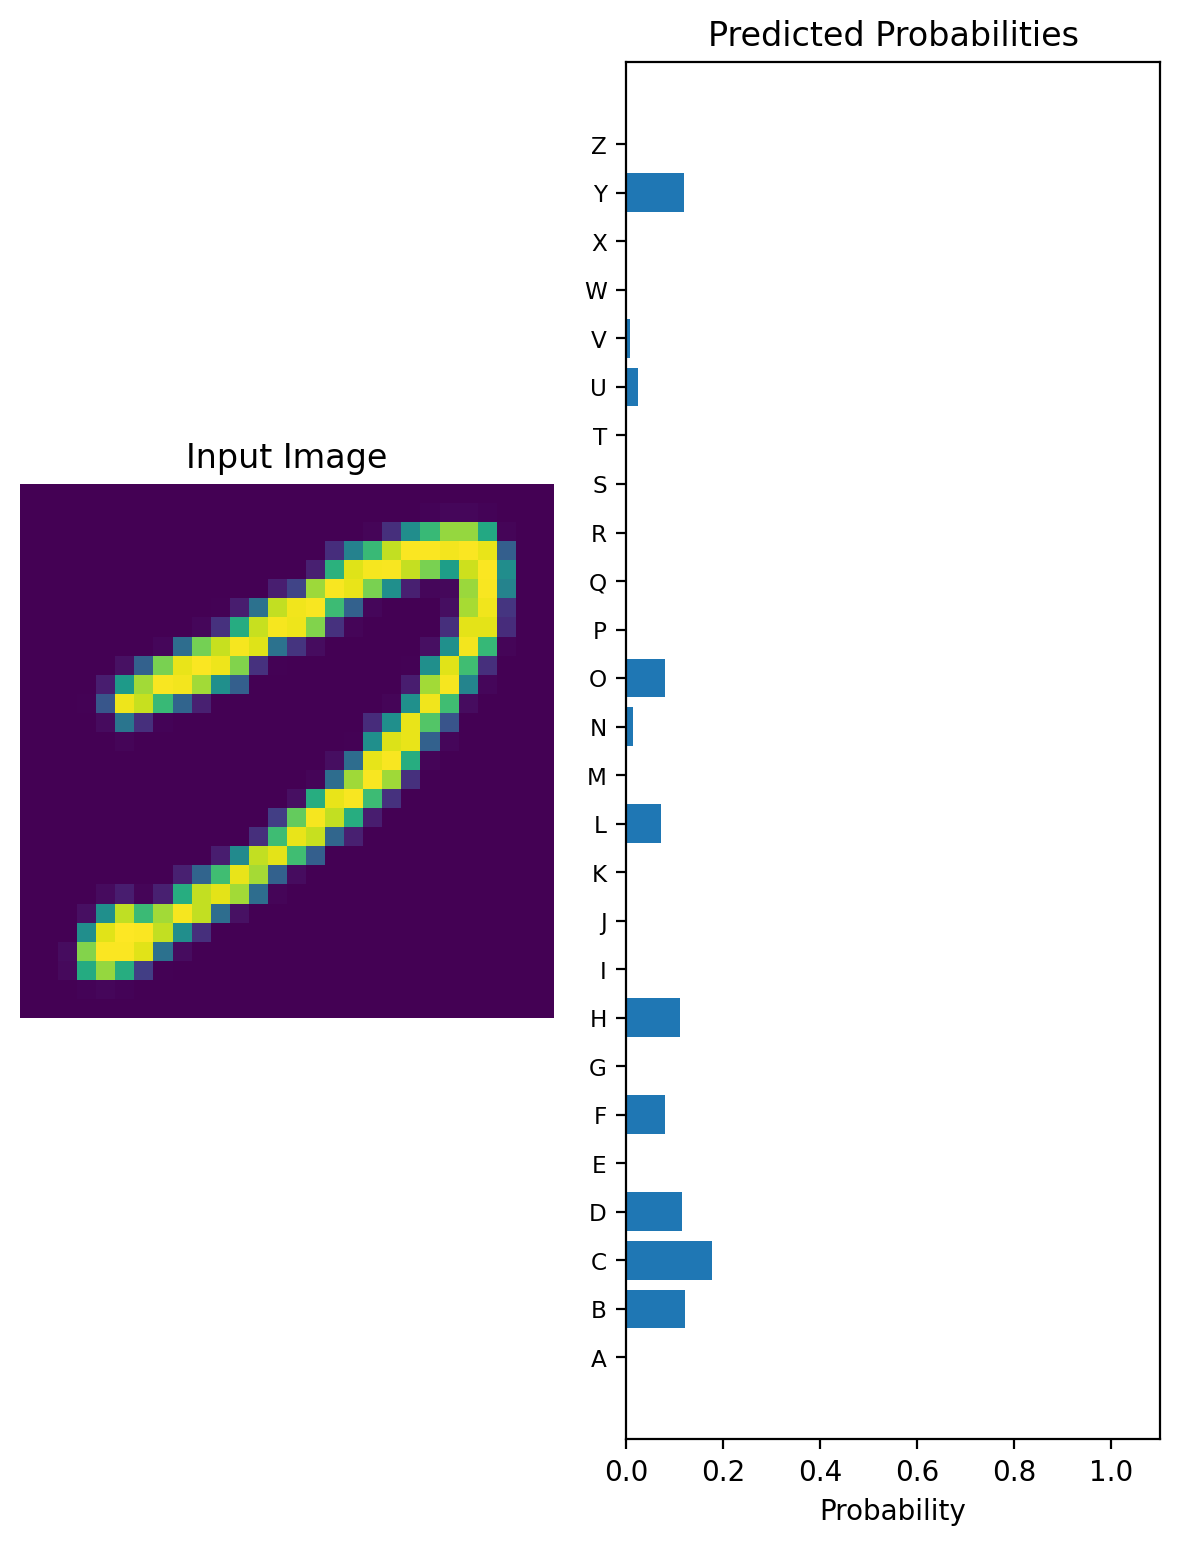

In [ ]:
# Grab some data
dataiter = iter(trainloader)#have to change this line becasuse compatibility
images, labels = next(dataiter)#have to change this line becasuse compatibility
# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify_letters(img.view(1, 28, 28), ps)

###Parte 3,4 y 5

Entrenamiento y medicion de las predicciones

### Fase de Entrenamiento de la Red Neuronal

Una vez que hemos construido nuestra red neuronal, el siguiente paso es entrenarla. Para ello, introduciremos dos conceptos clave:  

1. **Función de pérdida (Loss Function)**: Es una métrica que mide el error en las predicciones de nuestra red. Nos indica qué tan lejos están las salidas actuales de las esperadas. Minimizar este error es el objetivo central del entrenamiento.  

2. **Retropropagación (Backpropagation)**: Es una técnica que ajusta los pesos de la red neuronal basándose en el error calculado por la función de pérdida. Este proceso se realiza de manera iterativa y utiliza el gradiente descendente para optimizar los pesos y mejorar las predicciones.  

Gracias a la interacción entre estos dos conceptos, podemos guiar el aprendizaje de nuestra red para que su desempeño sea cada vez más preciso.


####Calculando el error

En pytorch nos proporciona algunas funciones de perdida ya implementadas

  *  nn.MSELoss(): Mean square error, otil para problemas de regression
  *  nn.CrossEntropyLoss(): Cross entropy loss, usualmente usada en problemas de clasificacion
  *  nn.BCELoss(): Binary cross entropy loss,util en contexto de  clasificacion binaria

en el siguiente ejemplo definimos una red neuronal , convertimos sus salidas en probabilidades usando *logsoftmax* y luego calculamos el error de la salida usando *nn.CrossEntropyLoss()* *italicized text*

In [ ]:
from torch import nn

# Construir un modelo feed-forward
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 26),  # Cambiar a 26 para EMNIST (letras)
    nn.LogSoftmax(dim=1)  # Agregar LogSoftmax para usar NLLLoss
)

# Definir la función de pérdida
criterion = nn.NLLLoss()

# Obtener los datos
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Ajustar las etiquetas al rango [0, 25]
labels = labels - 1  # EMNIST tiene etiquetas en el rango [1, 26]

# Aplanar las imágenes
images = images.view(images.shape[0], -1)

# Propagación hacia adelante, obtener los logits
logits = model(images)

# Calcular la pérdida
loss = criterion(logits, labels)

print(loss)

tensor(3.2701, grad_fn=<NllLossBackward0>)


#### Backpropagation

PyTorch simplifica el cálculo de gradientes gracias a su capacidad para registrar automáticamente las operaciones realizadas sobre tensores. Esta funcionalidad es esencial para implementar la retropropagación.  

Al crear tensores en PyTorch, podemos habilitar esta característica configurando el atributo `requires_grad=True`, lo que indica que queremos que PyTorch registre las operaciones sobre ese tensor para calcular sus gradientes. Aunque este atributo es opcional, en muchos casos es **True** de manera predeterminada, dependiendo del contexto.

Ahora veamos como se actualiza despues de una llamada a backward:


In [ ]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        ...,
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


#### Optimizer

Un Optimizer es responsable de ajustar los pesos utilizando el algoritmo seleccionado y los parámetros proporcionados, como el modelo, los pesos y la función de pérdida.  

pytorch nos da algunos Optimizers ya implementados:
* torch.optim.Adam(): The Adam algorithm (adaptive moment estimation)
* torch.optim.NAdam(): The Adam algorithm con Nesterov momentum
* torch.optim.SGD(): Stochastic gradient descent

Con este ultimo vamos a definir un optimizer y le pasaremos un modelo junto a la funcion de perdida , para actualizar los pesos a lo largo de varias iteraciones "epochs"

In [ ]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 26),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten EMNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        #Forward pass, then backward pass, then update weights
        output = model(images)
        loss = criterion(output, labels -1 )
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 2.8979058932035398
Training loss: 1.6905713982765491
Training loss: 1.320185648386295
Training loss: 1.189588709855691
Training loss: 1.1065577064110683


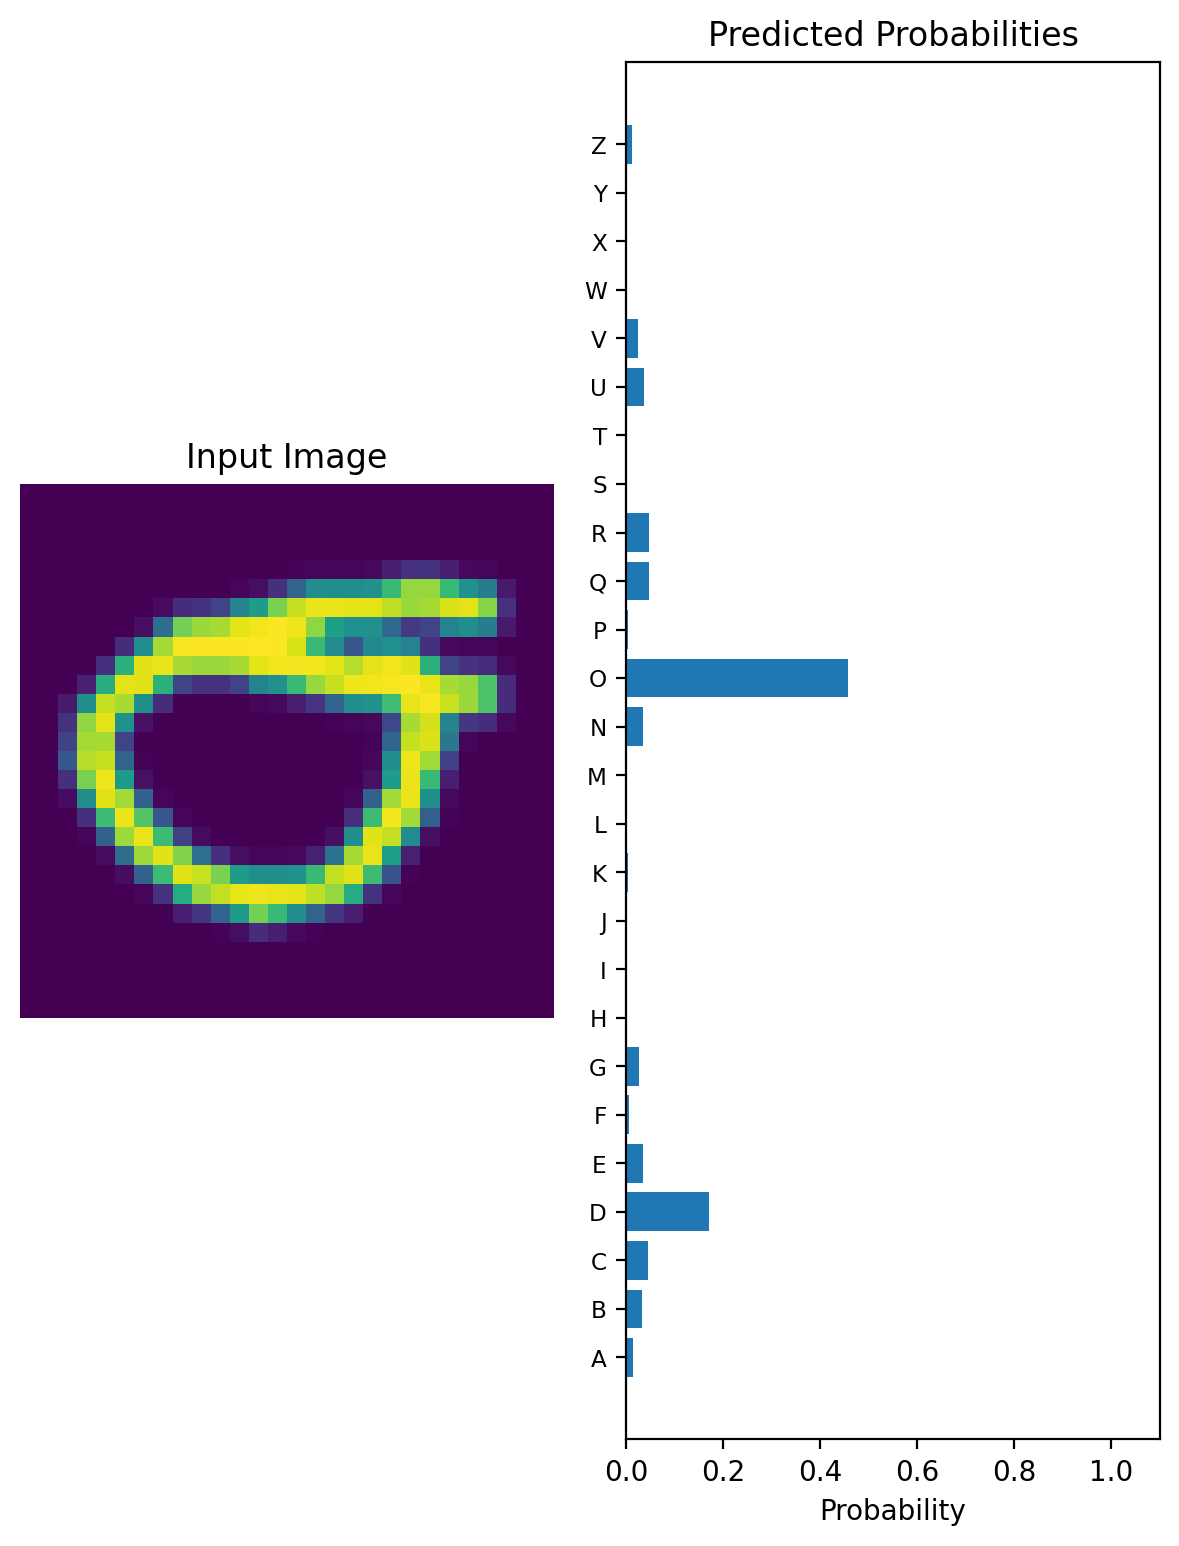

In [ ]:
%matplotlib inline
import helper

dataiter = iter(trainloader)
images, labels = next(dataiter)

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify_letters(img.view(1, 28, 28), ps ,version="Custom")

###Validacion y Regularizacion



####Validacion

ahora que podemos entrenar neustra red vale la pena  revisar que tan bien hace su trabajo y para eso podemos medir de distintas formas la fiabilidad de sus predicciones.

en las siguientes lineas vamos a usar una variacion de nuestro dataset original para presentar algunas muestras que no estan en el conjunto de entrenamiento y mediremos porcentaje de las predicciones son correctas.

In [22]:

# Download and load the test data
testset = datasets.EMNIST(root='~/.pytorch/EMNIST_data/', split='letters', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

from torch import nn, optim
import torch.nn.functional as F

#to create Model faster
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 26)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [23]:
model = Classifier()
criterion = nn.NLLLoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30

train_losses, test_losses = [], []
for e in range(epochs):
    tot_train_loss = 0
    for images, labels in trainloader:
        labels = labels - 1
        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        tot_train_loss += loss.item()

        loss.backward()
        optimizer.step()
    else:
        tot_test_loss = 0
        test_correct = 0  # Number of correct predictions on the test set

        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
              labels = labels - 1
              log_ps = model(images)
              loss = criterion(log_ps, labels)
              tot_test_loss += loss.item()

              ps = torch.exp(log_ps)
              top_p, top_class = ps.topk(1, dim=1)
              equals = top_class == labels.view(*top_class.shape)
              test_correct += equals.sum().item()

        # Get mean loss to enable comparison between train and test sets
        train_loss = tot_train_loss / len(trainloader.dataset)
        test_loss = tot_test_loss / len(testloader.dataset)

        # At completion of epoch
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print(f"Epoch: {e+1}/{epochs}.. "
              f"Training Loss: {train_loss:.3f}.. "
              f"Test Loss: {test_loss:.3f}.. "
              f"Test Accuracy: {test_correct / len(testloader.dataset):.3f}")

Epoch: 1/30.. Training Loss: 0.765.. Test Loss: 0.496.. Test Accuracy: 0.844
Epoch: 2/30.. Training Loss: 0.470.. Test Loss: 0.472.. Test Accuracy: 0.854
Epoch: 3/30.. Training Loss: 0.422.. Test Loss: 0.471.. Test Accuracy: 0.858
Epoch: 4/30.. Training Loss: 0.397.. Test Loss: 0.441.. Test Accuracy: 0.865
Epoch: 5/30.. Training Loss: 0.374.. Test Loss: 0.405.. Test Accuracy: 0.876
Epoch: 6/30.. Training Loss: 0.362.. Test Loss: 0.431.. Test Accuracy: 0.869
Epoch: 7/30.. Training Loss: 0.352.. Test Loss: 0.451.. Test Accuracy: 0.869
Epoch: 8/30.. Training Loss: 0.340.. Test Loss: 0.419.. Test Accuracy: 0.877
Epoch: 9/30.. Training Loss: 0.334.. Test Loss: 0.440.. Test Accuracy: 0.866
Epoch: 10/30.. Training Loss: 0.326.. Test Loss: 0.396.. Test Accuracy: 0.884
Epoch: 11/30.. Training Loss: 0.320.. Test Loss: 0.407.. Test Accuracy: 0.884
Epoch: 12/30.. Training Loss: 0.314.. Test Loss: 0.404.. Test Accuracy: 0.886
Epoch: 13/30.. Training Loss: 0.312.. Test Loss: 0.412.. Test Accuracy: 0

####Regularizacion

cuando entrenamos nuestro modelo este se hace cada vez mejor reconociendo elementos del dataset pero mas impresiso para elementos fuera de el a este problema se le suele llamar **overfitting** y para arreglarlo se propone la tecnica de regularizacion mediante **droppout** que desactiva de forma aleatoria algunas neuronas en cada capa con una probabilidad específica. Esto obliga al modelo a no depender excesivamente de ciertas características, mejorando su capacidad de generalización.

In [24]:
#redefining Classifier to add Dropout
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 26)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

In [25]:
## TODO: Train your model with dropout, and monitor the training progress with the validation loss and accuracy

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        labels = labels - 1
        # Reiniciar los gradientes para evitar acumulaciones
        optimizer.zero_grad()

        # Pasar las imágenes por el modelo y calcular la pérdida
        log_ps = model(images)
        loss = criterion(log_ps, labels)

        # Retropropagación para ajustar los pesos
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            # Configurar el modelo en modo evaluación para evitar cálculos innecesarios
            model.eval()
            for images, labels in testloader:
                labels = labels - 1
                # Pasar las imágenes del conjunto de prueba por el modelo
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)

                # Calcular la probabilidad y verificar predicciones correctas
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        # Volver al modo de entrenamiento
        model.train()

        # Registrar las pérdidas promedio para entrenamiento y prueba
        train_losses.append(running_loss / len(trainloader))
        test_losses.append(test_loss / len(testloader))

        # Mostrar métricas del progreso
        print(f"Epoch: {e+1}/{epochs}.. "
              f"Training Loss: {train_losses[-1]:.3f}.. "
              f"Test Loss: {test_losses[-1]:.3f}.. "
              f"Test Accuracy: {accuracy / len(testloader):.3f}")

Epoch: 1/30.. Training Loss: 1.185.. Test Loss: 0.641.. Test Accuracy: 0.796
Epoch: 2/30.. Training Loss: 0.881.. Test Loss: 0.585.. Test Accuracy: 0.817
Epoch: 3/30.. Training Loss: 0.822.. Test Loss: 0.567.. Test Accuracy: 0.832
Epoch: 4/30.. Training Loss: 0.787.. Test Loss: 0.520.. Test Accuracy: 0.841
Epoch: 5/30.. Training Loss: 0.768.. Test Loss: 0.534.. Test Accuracy: 0.836
Epoch: 6/30.. Training Loss: 0.751.. Test Loss: 0.493.. Test Accuracy: 0.848
Epoch: 7/30.. Training Loss: 0.740.. Test Loss: 0.485.. Test Accuracy: 0.849
Epoch: 8/30.. Training Loss: 0.725.. Test Loss: 0.486.. Test Accuracy: 0.853
Epoch: 9/30.. Training Loss: 0.721.. Test Loss: 0.466.. Test Accuracy: 0.858
Epoch: 10/30.. Training Loss: 0.713.. Test Loss: 0.475.. Test Accuracy: 0.853
Epoch: 11/30.. Training Loss: 0.708.. Test Loss: 0.490.. Test Accuracy: 0.850
Epoch: 12/30.. Training Loss: 0.707.. Test Loss: 0.477.. Test Accuracy: 0.857
Epoch: 13/30.. Training Loss: 0.694.. Test Loss: 0.450.. Test Accuracy: 0

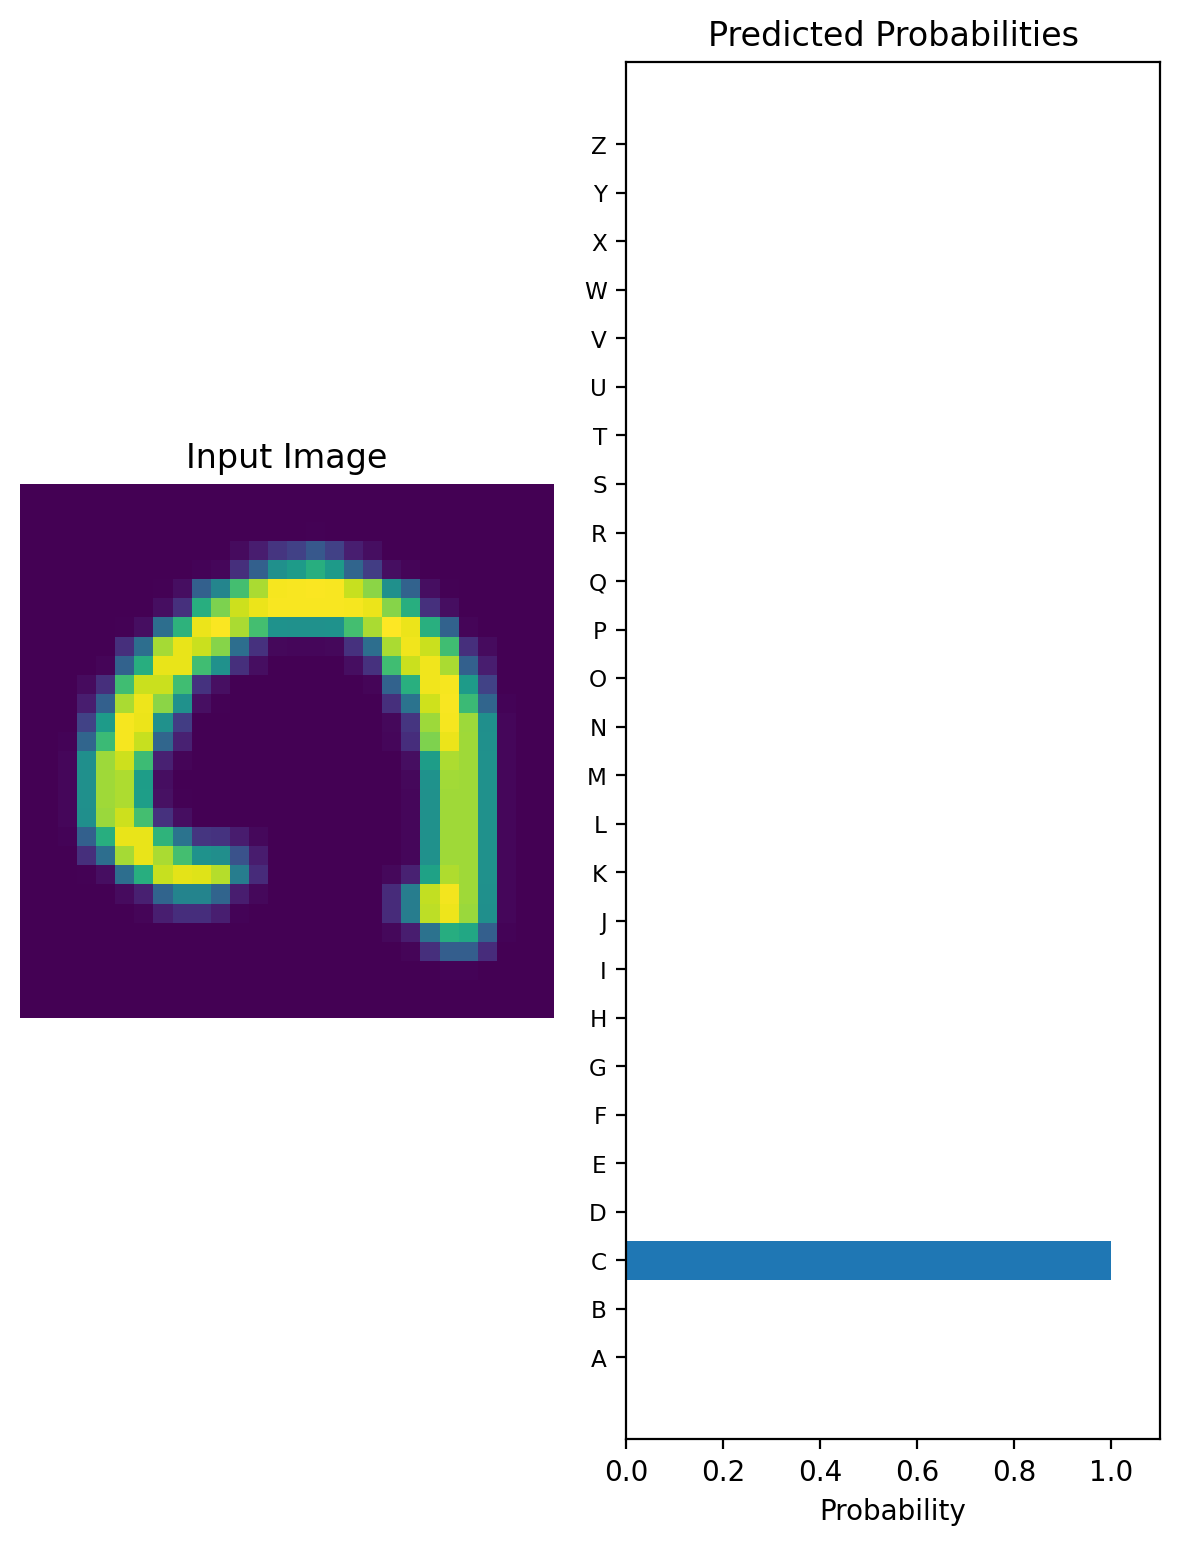

In [27]:
# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify_letters(img.view(1, 28, 28), ps, version='Fashion')
